In [1]:
'''                                  ReadMe                                                      '''
'''# Nessa célula vamos apenas mudar a função geradora do estado a ser preparado                 '''
'''# Basta alterar a função que gera o estado, nesse caso target_op = init_state_ref(n_qubits, p)'''

from src.vqa_tools import general_vqacircuit_penny 
from src.state_initializer import  init_state_ref,init_state_bpf
from src.generalize import *
from torch import tensor
from numpy import sin,cos,sqrt,outer,zeros, pi
import cmath

def state_amplitude_damping(theta, phi, p):
    state = zeros(4,dtype=complex)    
    state[0] = cos(theta/2)
    state[1] = sqrt(p)
    state[2] = sqrt(1-p)*cmath.exp(1j*phi)*sin(theta/2)
    target_op = outer(state.conj(), state)
    target_op = tensor(target_op)
    return target_op


def run_calcs(list_p, epochs):
    coerencias_R = []
    coerencias_L = []
    pretrain = True
    count = 0
    n_qubits = 2
    depht = 3
    _, params, _, _ = start_things(2, 3)
    for p in list_p:
        print(f'{count} de {len(list_p)}')
        count += 1

        circuit, _ = general_vqacircuit_penny(n_qubits, depht)

        #_, target_op = init_state_ref(n_qubits, p)
        #_, target_op = init_state_bpf(n_qubits, p)
        target_op = state_amplitude_damping(pi/2, 0, p)

        qc, qr, params = optmize(epochs, n_qubits, circuit, params, target_op, pretrain)
        pretrain = False
        rho = tomograph(qc, qr)
        #print(rho)
        coerencias_L, coerencias_R = results(rho, coerencias_R, coerencias_L)

    plots(list_p, coerencias_R, coerencias_L)
    

# Results


[0.   0.25 0.5  0.75 1.  ]
0 de 5
0.9990234375
0.998046875
0.998046875
0.9990234375
0.998046875
0.998046875
0.9990234375
0.998046875
1.0
0.998046875
0.998046875
0.99609375
1.0
0.998046875
0.9990234375
0.99609375
0.99609375
0.998046875
0.9970703125
0.9990234375
0.9990234375
0.9970703125
0.9970703125
0.9970703125
1.0
0.998046875
0.994140625
1.0
0.9970703125
0.9970703125
0.9990234375
1.0
0.998046875
0.9990234375
1.0
1 de 5
0.876708984375
0.9239501953125
0.9459228515625
0.9217529296875
0.9107666015625
0.966796875
0.966796875
0.9591064453125
0.982177734375
0.968994140625
0.9635009765625
0.984375
0.9854736328125
0.984375
0.99755859375
0.9931640625
0.9700927734375
1.0008544921875
0.9744873046875
0.966796875
0.9656982421875
0.97998046875
0.982177734375
0.97998046875
0.9755859375
0.984375
1.0030517578125
0.9744873046875
0.9547119140625
0.9744873046875
0.973388671875
0.982177734375
0.9744873046875
0.9722900390625
0.984375
2 de 5
0.68115234375
0.643310546875
1.119384765625
1.08642578125
1.0888671

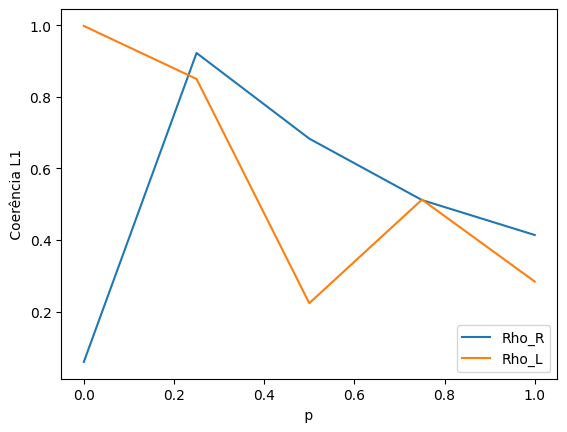

In [2]:
#list_p = [0,0.25,0.5,0.75,1]
list_p = np.linspace(0,1,5)
print(list_p)
run_calcs(list_p, 35)

In [14]:
list_p = np.linspace(0,1,5)
print(list_p)

[0.   0.25 0.5  0.75 1.  ]
